In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io

from scipy.signal import welch as pwelch

### Preguntas de la guía:
1.   Compruebe que los valores de las primeras cinco muestras son los mismos

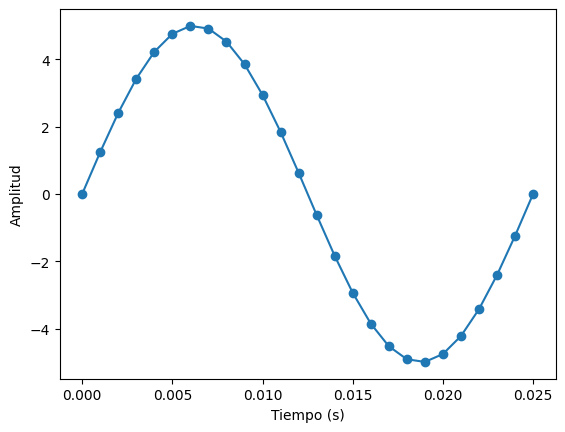

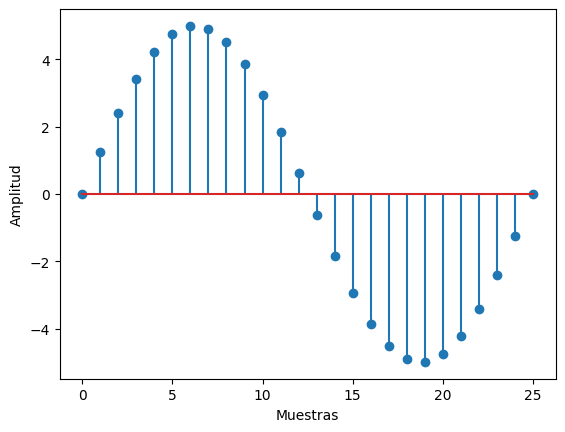

 Primeros 5 valores en domino temporal 
           0
0  0.000000
1  1.243449
2  2.408768
3  3.422736
4  4.221640
Primeros 5 valores en domino frecuencial 
           0
0  0.000000
1  1.243449
2  2.408768
3  3.422736
4  4.221640 
 Si se compara se tiene que: [True, True, True, True, True]


In [5]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal

Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)

plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)

plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

cinco_x=x[:5]
cinco_x1=x1[:5]
z_=[]
for i in range(cinco_x.shape[0]):
    z = cinco_x[i] == cinco_x1[i]
    z_.append(z)
print(f' Primeros 5 valores en domino temporal \n {pd.DataFrame(cinco_x)}')
print(f'Primeros 5 valores en domino frecuencial \n {pd.DataFrame(cinco_x1)} \n Si se compara se tiene que: {z_}')

In [6]:
# Dominio del Tiempo
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)


# Dominio de la frecuencia
energia_f = sum(x1**2)
potencia_f = energia_f/(len(t)-1)
rms_f = np.sqrt(potencia_f)

print(f'Dominio temporal \n {potencia} \n Dominio frecuencial \n {potencia_f}')

Dominio temporal 
 12.500000000000002 
 Dominio frecuencial 
 12.500000000000002


In [7]:
print(f'Dominio temporal \n {rms} \n Dominio frecuencial \n {rms_f}')

Dominio temporal 
 3.5355339059327378 
 Dominio frecuencial 
 3.5355339059327378


2.   La potencia es la misma que en x(n) ¿Por qué?

Desde la conversión de analógica a digital se conoce que durante este proceso hay pérdida de información lo que supondría una perdida de energía en la señal discretizada, sin embargo, la frecuencia de muestreo utilizada juega un gran papel importante ya que es directamente relacionada con el error que se genere por dicha perdida de información  [1].

Para este ejercicio, al tener la señal en un computador, la señal ya está digitalizada, el cambio que se realiza en este caso es mostrarlo como discretizado pero maneja la misma cantidad de muestras que en las que se tomó la señal, por lo que no hay cambio entre ellas. Sin afectar amplitud o potencia. En este caso solo afecta el eje x que varía de tiempo a muestras respectivamente.

También se puede explicar a raíz de la fórmula de Parseval demuestra que existe una función invariante no lineal para la DFT, por lo que la energía total de una señal puede calcularse a partir de la señal o de su DFT utilizando la misma función no lineal [2].

4.1 Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40,
80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal,
y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.

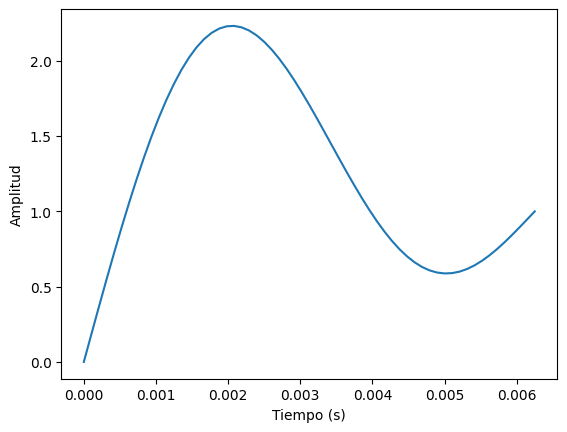

In [8]:
Fo = 160 #Fmax de las señales
Fs= 60*160 #Se uso nyquist, se multiplico por 60 para mejorar la resolución
To = 1/Fo
Ts = 1/Fs
t = np.arange(0,To+Ts,Ts)

x = np.sin(2*np.pi*40*t)+np.sin(2*np.pi*80*t)+np.sin(2*np.pi*160*t)
plt.plot(t, x)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

4.2 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia.
Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos
de la señal).

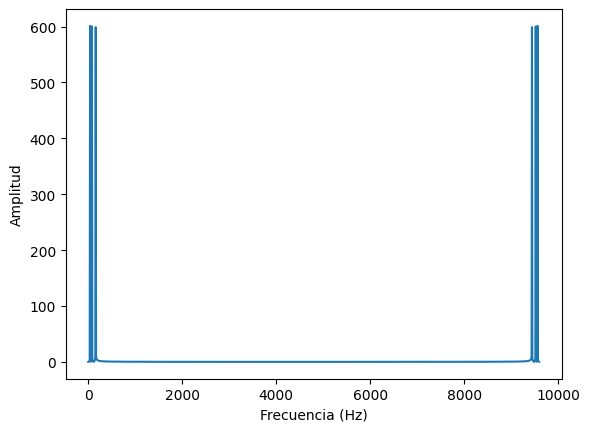

In [9]:
t_20ciclos = np.arange(0,20*To+Ts,Ts)
x_20ciclos = np.sin(2*np.pi*40*t_20ciclos)+np.sin(2*np.pi*80*t_20ciclos)+np.sin(2*np.pi*160*t_20ciclos)
x_20ciclos = np.fft.fft(x_20ciclos)

N = len(x_20ciclos)

F = np.arange(0,N)*Fs/N
plt.plot(F,abs(x_20ciclos))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

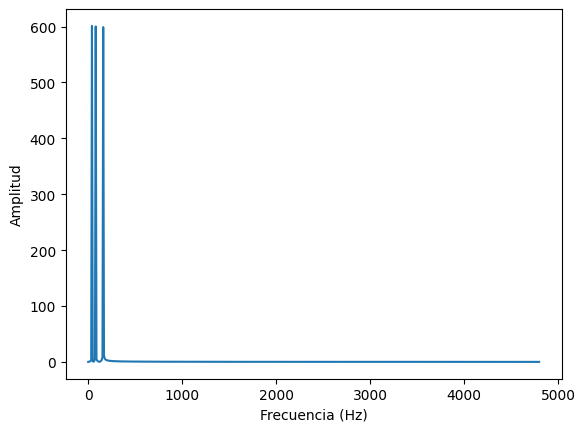

In [10]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X20mitad = x_20ciclos[0:Nmitad]
plt.plot(Fmitad,abs(X20mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

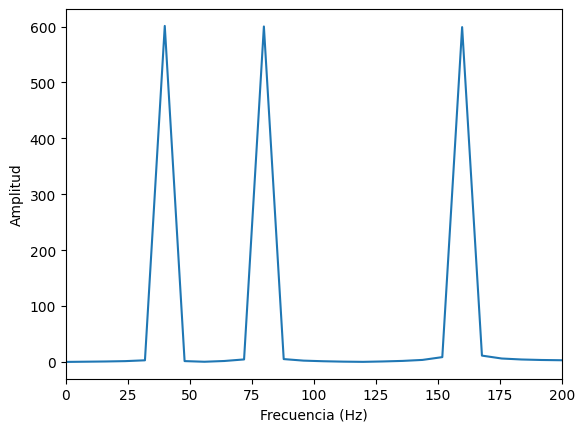

In [11]:
plt.plot(Fmitad,abs(X20mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,200)
plt.show()


Se decidió trabajar con 20 ciclos para poder mejorar la resolución y obtener los picos en las frecuencias debidas, ya que al hacerlo con 10 ciclos el pico de la frecuencia 40 no se formaba de manera correcta. esto es debido a que no capturaba la información necesaria para lograrlo

4.3 Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier.
Aplíquelo a la señal anterior.

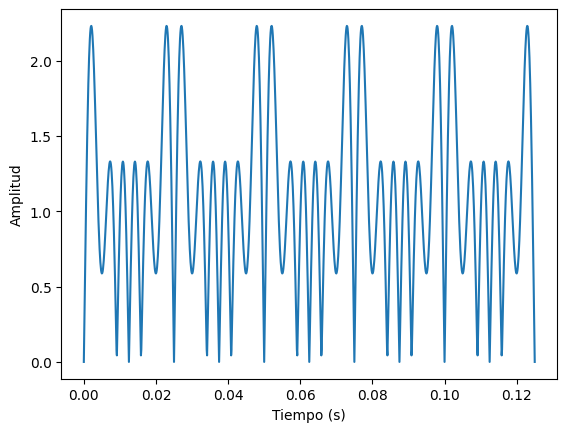

In [12]:
# Se aplico la transformada inversa de Fourier a la señal que estaba conformada por 20 ciclos
reconstruir_x = np.fft.ifft(x_20ciclos)

plt.plot(t_20ciclos,abs(reconstruir_x))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

Para comprender de mejor manera como funcionaba la transformada inversa de Fourier se decidió aplicarle la transformada a la señal incial (1 ciclo) y luego se inversa para comprobar que si retornaba lo mismo

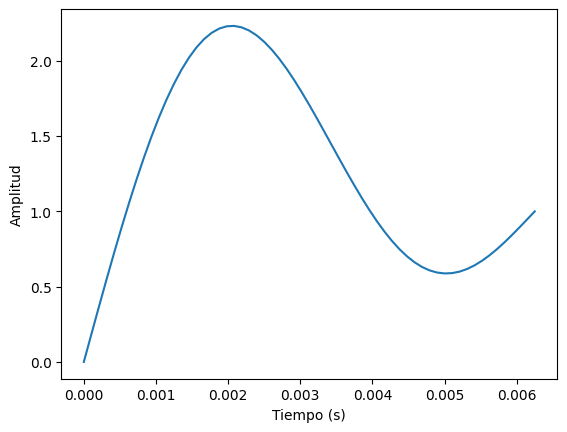

In [13]:
# Se aplico la transformada de Fourier y luego la inversa a la señal inicial
fourier_1ciclo = np.fft.fft(x)
inversa_x = np.fft.ifft(fourier_1ciclo)

plt.plot(t,abs(inversa_x))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

4.4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?

<ipython-input-14-57f7f90ef063>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13]; # Se esta seleccionando los valores de los índices de F1 (9 a 12) y se están copiando en F2


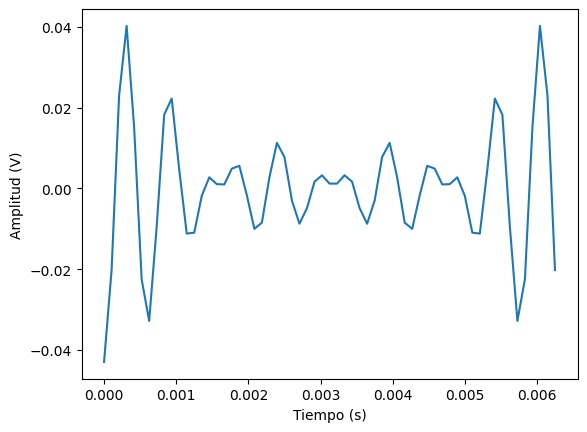

In [14]:
F1 = np.fft.fft(x); # Aplica transformada de fourier a la señal x
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13]; # Se esta seleccionando los valores de los índices de F1 (9 a 12) y se están copiando en F2
xr = np.fft.ifft(F2); # Aplica la inversa a la señal F2 para visualizarla en el dominio del tiempo
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()


Inicialmente se puede decir que se esta aplicando un filtro debido a que se reduce la amplitud de la señal. Adicionalmente, al analizar el código paso a paso, se observa que la señal "x" se pasa del dominio del tiempo al de la frencuencia "F1" y que luego se genera "F2" del mmismo tamaño que "F1" solo que conformada por 0, a continuación  con este se selecciona solo un rango de frecuencias de "F1" y se copian en "F2" por lo cual la frecuencia de este sera de ceros en los indices diferentes de 9 a 12, por tal motivo se puede decir que se esta aplicando un filtro.   

4.5 El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de
muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas
de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que
se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de
Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning,
y justificar la elección del solapamiento y el ancho de la ventaja)

In [15]:
from google.colab import drive
drive.mount('/content/drive') #force_remount=True


archivo = '/content/drive/MyDrive/ColabNotebooks/Biosenales/Practica_5/senecg.mat'
data = scipy.io.loadmat(archivo)

señal = data['ECG'].flatten()
print(señal)

Mounted at /content/drive
[ 0.16479384 -0.00455636 -0.23589197 ...  0.00518452 -0.18447972
  0.015     ]


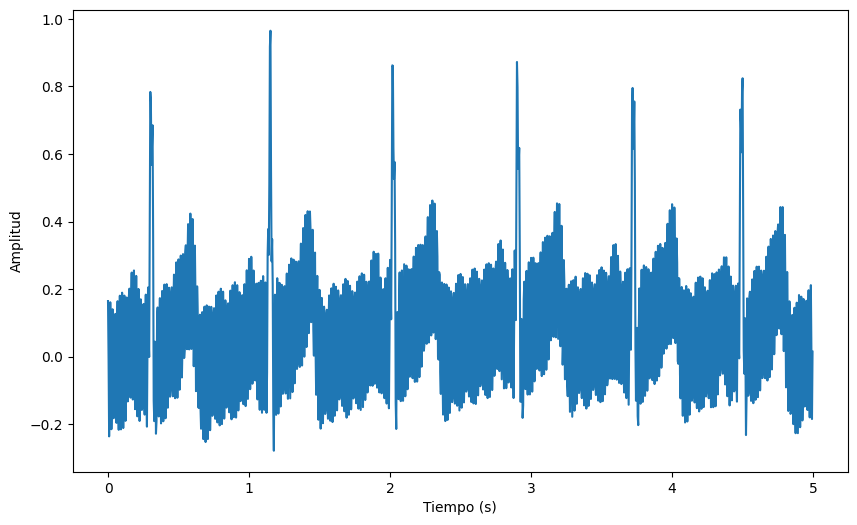

In [16]:
Fs = 250 # Frecuencia de muestreo
Ts = 1/Fs # Periodo de muestreo

def tiempo(fs,archivo):
    paso = 1/fs
    fin = len(archivo)
    dato=paso*fin
    tiempo = np.arange(0,dato,paso)
    return tiempo

t = tiempo(Fs,señal)

plt.figure(figsize=(10, 6))
plt.plot(t, señal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1250, using nperseg = 1250
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


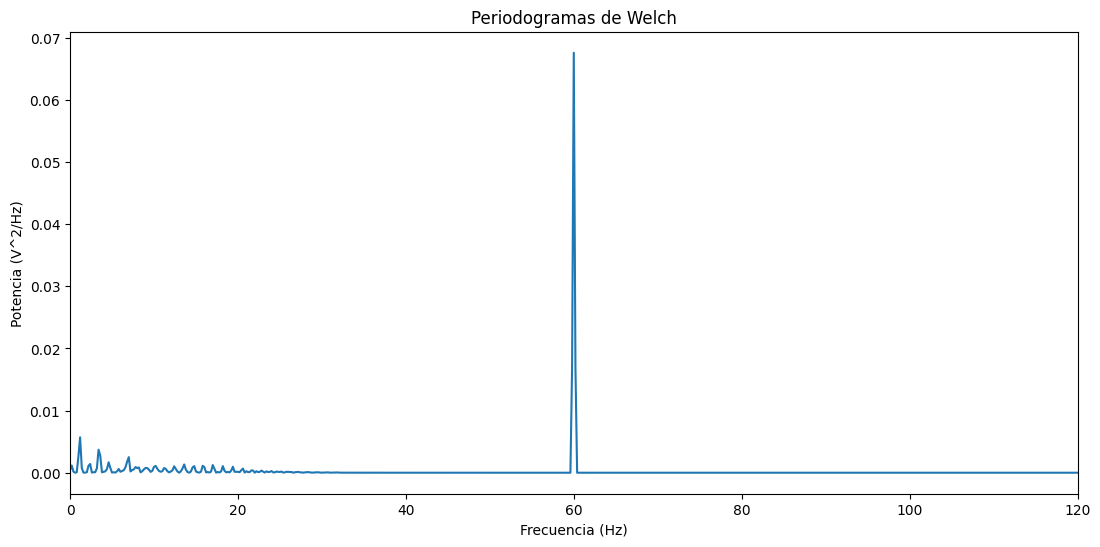

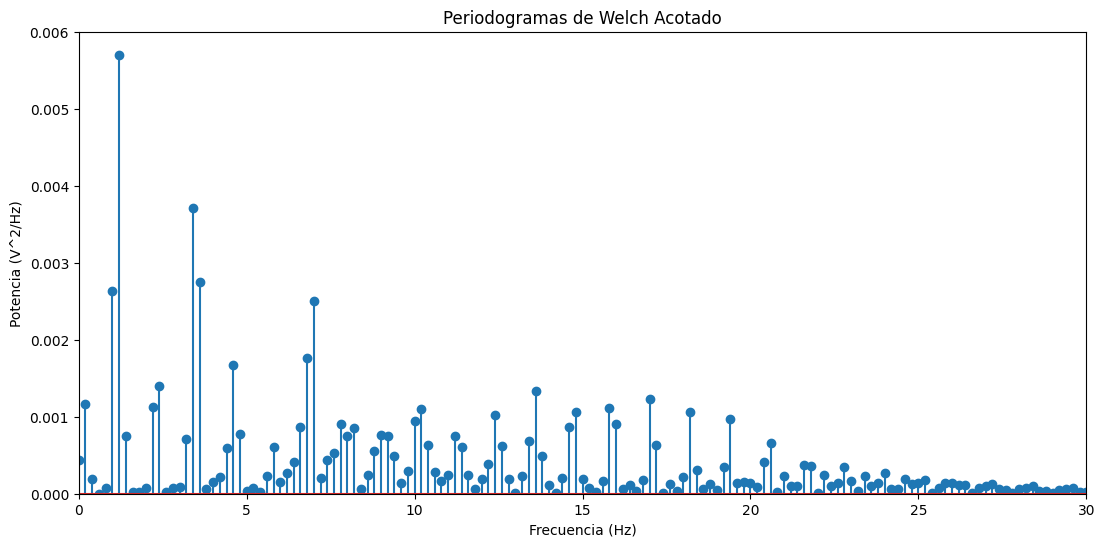

In [17]:
nperseg=2000 #Ancho de la ventana
noverlap = int(nperseg/2) #Solapamiento

f,Pxx = pwelch(señal,Fs,'hann',2000,1000)


plt.figure(figsize=(13, 6))
plt.plot(f,Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.title("Periodogramas de Welch")
plt.xlim([0,120])
plt.show()

plt.figure(figsize=(13, 6))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.xlim([0, 30])  # rango para el eje X
plt.ylim([0, 0.006])  # rango para el eje y
plt.title("Periodogramas de Welch Acotado")
plt.show()

Es necesario eliminar el ruido de la señal, esto se evidencia principalmente en la frecuencia de 60 Hz en la cual se observa un pico de potencia elevado a los demás. Se conoce que este pico es un ruido provocado por la red de alimentación

In [18]:
# Encontrar el índice del valor máximo en Pxx
indice_maximo = np.argmax(Pxx)
# Obtener el valor máximo de Pxx y su correspondiente frecuencia
valor_maximo = Pxx[indice_maximo]
frecuencia_maxima = f[indice_maximo]
print(f'El valor máximo de Pxx es {valor_maximo} y se encuentra en la frecuencia {frecuencia_maxima} Hz')

F_señal = np.fft.fft(señal); # Aplica transformada de fourier a la señal

# Calcula la magnitud de F_señal
magnitud = np.abs(F_señal)
# Encuentra el valor más alto de la magnitud
valor_maximo = np.max(magnitud)
# Encuentra el índice del valor más alto de la magnitud
indice_maximo = np.argmax(magnitud)
print(f'La posición de la potencia máxima en el array de la frecuencia es {indice_maximo}')

El valor máximo de Pxx es 0.06758193474078875 y se encuentra en la frecuencia 60.0 Hz
La posición de la potencia máxima en el array de la frecuencia es 300


Para proceder a realizar el filtro se necesitaba conocer que índices del array de la frecuencia se podian tomar y cuales se procederian a dejar en cero, por esto motivo se busco la posición donde se encontraba la potencia máxima de la señal. Se conoció que era en la posición 300 que corresponde a los 60 Hz, por eso el filtro debia ser un pasa bajas que tomara los valores que se encontraban por debajo de esta posición

<ipython-input-19-302dda0d0a7b>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F_filtrada[1:300] = F_señal[1:300];


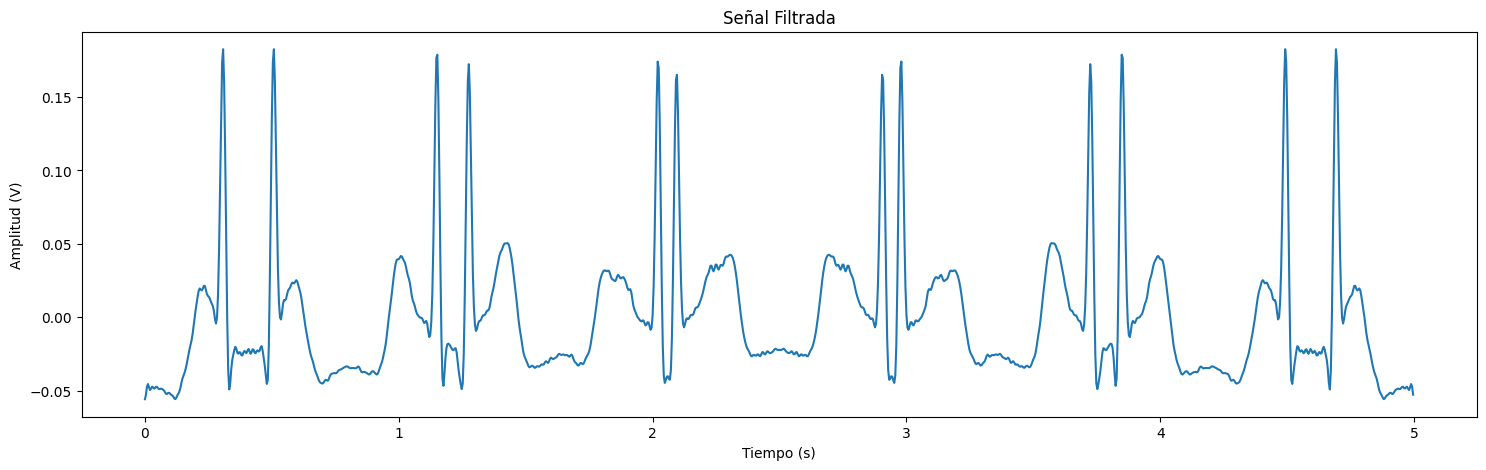

In [19]:
F_filtrada = np.zeros((len(F_señal)));
# Se selecciona los valores de los índices de la frecuencia de la señal (1 a 300) y se están copiando en la frecuencia para la filtrada
F_filtrada[1:300] = F_señal[1:300];
señal_filtrada = np.fft.ifft(F_filtrada); # Aplica la inversa a la señal filtrada para visualizarla en el dominio del tiempo
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(111)
ax.plot(t, np.real(señal_filtrada))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.title("Señal Filtrada")
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:462: UserWarning: Input data is complex, switching to return_onesided=False
  freqs, Pxx = csd(x, x, fs=fs, window=window, nperseg=nperseg,


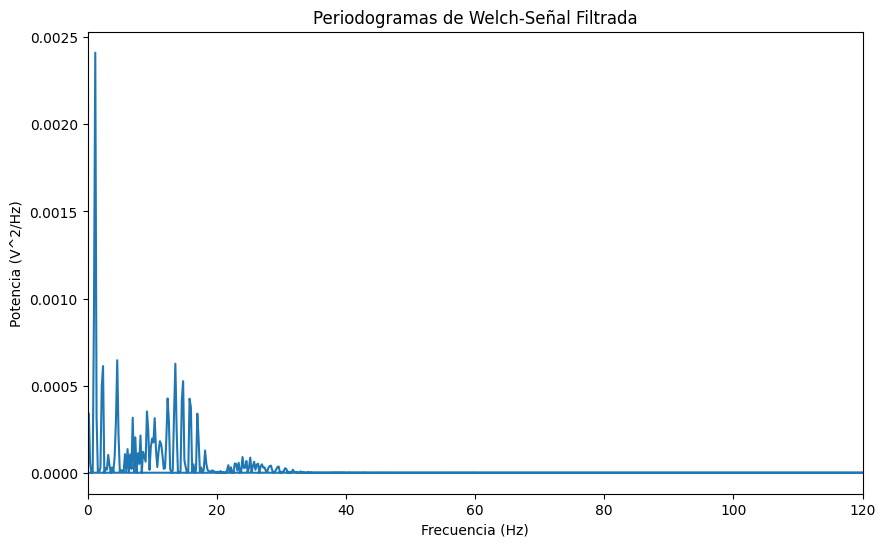

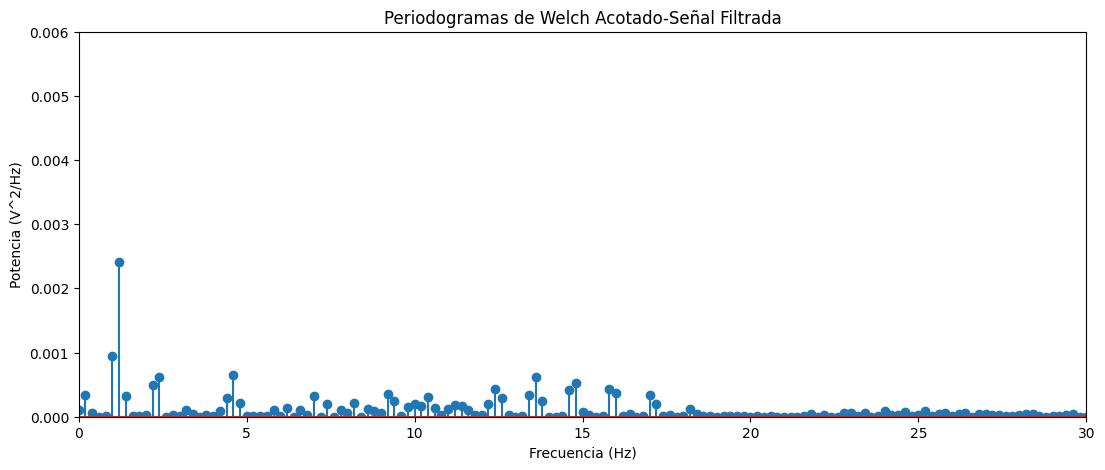

In [20]:
nperseg=2000 #Ancho de la ventana
noverlap = int(nperseg/2) #Solapamiento

f,Pxx = pwelch(señal_filtrada,Fs,'hann',2000,1000)


plt.figure(figsize=(10, 6))
plt.plot(f,Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.title("Periodogramas de Welch-Señal Filtrada")
plt.xlim([0,120])
plt.show()

plt.figure(figsize=(13, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.xlim([0, 30])  # rango para el eje X
plt.ylim([0, 0.006])  # rango para el eje y
plt.title("Periodogramas de Welch Acotado-Señal Filtrada")
plt.show()

En los gráficos anteriores del periodograma de Welch se puede observar que el pico que se encontraba en la frecuencia de los 60 Hz ha desaparecido, lo que quiere decir que el filtro no permitió su paso. Por otra parte, también se puede evidenciar que el filtro funciona ya que al observar la señal filtrada en el dominio del tiempo se ve una señal más limpia con unas amplitudes de menor tamaño.   

Adicionalmente, para realizar todos los periodogramas de Welch se debía considerar qué tamaño de ventana y solapamiento usar, ya que esta decisión afectaba directamente a la resolución de la señal. En primera parte se observó una mayor diferencia de resolución al variar el tamaño de la ventana con respecto al del solapamiento, ya que al poner ventanas de tamaños muy pequeños se perdía la calidad de esta debido a que no obtenía información suficiente para graficar debidamente la señal y por otro lado se observó que a tamaños mayores de 2000 no había muchos cambios significativos.

Por este motivo se decidió una ventana de 2000 y un solapamiento de 1000.

4.6 Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG
de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto
1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al
azar. Realice un análisis comparativo de las señales según lo que le indiquen los
periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el
ancho de la ventaja)

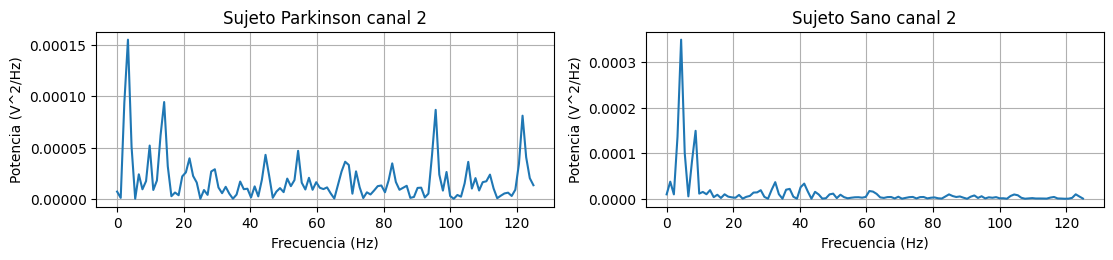

In [66]:
canal2_paciente_park = (pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Biosenales/Practica_5/canal2_paciente_park.xlsx').to_numpy()).flatten()
canal2_paciente_sano = (pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Biosenales/Practica_5/canal2_paciente_sano.xlsx').to_numpy()).flatten()


nperseg=230 #Ancho de la ventana
noverlap = int(nperseg/2) #Solapamiento

f,Pxx = pwelch(canal2_paciente_park,Fs,'hann',nperseg,noverlap)
f_s,Pxx_s = pwelch(canal2_paciente_sano,Fs,'hann',nperseg,noverlap)

plt.figure(figsize=(13, 5))
plt.subplot(2,2,1)
plt.title('Sujeto Parkinson canal 2')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.grid(True)
plt.plot(f,Pxx)

plt.subplot(2,2,2)
plt.title('Sujeto Sano canal 2')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.plot(f_s,Pxx_s)
plt.grid(True)
plt.show()

maxP_p=np.argmax(Pxx)
val_max_p = Pxx[maxP_p]
frecuencia_maxima_p = f[maxP_p]

maxP_s=np.argmax(Pxx_s)
val_max_s = Pxx_s[maxP_s]
frecuencia_maxima_s = f[maxP_s]



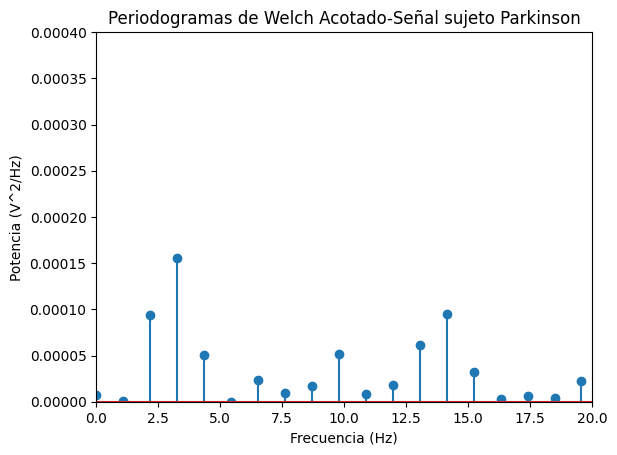

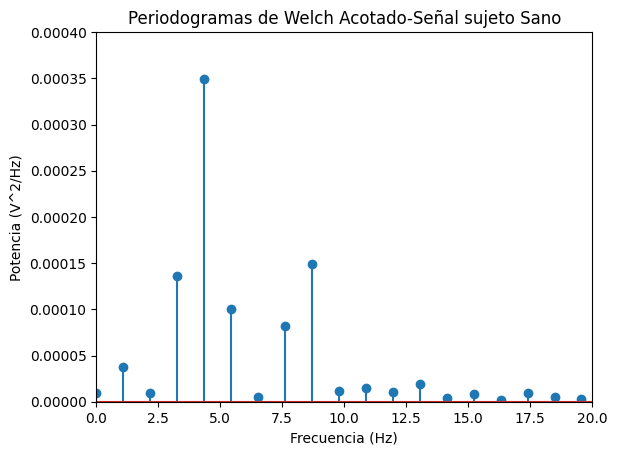

Valor máximo de la potencia para el sujeto con Parkinson es de: 0.0001552088218557982 a una frecuencia de: 3.260869565217391 
 Para el sujeto sano es de: 0.0003494155825144653 a una frecuencia de 4.3478260869565215


In [67]:
plt.figure()
plt.stem(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.xlim([0, 20])  # rango para el eje X
plt.ylim([0, 0.00040])  # rango para el eje y
plt.title("Periodogramas de Welch Acotado-Señal sujeto Parkinson")
plt.show()

plt.stem(f_s, Pxx_s)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.xlim([0, 20])  # rango para el eje X
plt.ylim([0, 0.00040])  # rango para el eje y
plt.title("Periodogramas de Welch Acotado-Señal sujeto Sano")
plt.show()

print(f'Valor máximo de la potencia para el sujeto con Parkinson es de: {val_max_p} a una frecuencia de: {frecuencia_maxima_p} \n Para el sujeto sano es de: {val_max_s} a una frecuencia de {frecuencia_maxima_s}')


EL tamaño de le ventana se definió de 230 porque se buscaba un tamaño que representara bien la señal sin perder información importante, pero que suavizara los valores de las frecuencias secundarias [3],por lo que se buscaba que los picos más altos no se perdieran, al utilizar valores menores a 200 se perdía información, pues las puntas de de dichos picos empezaban a curvarse. Por otro lado, para valores mayores a 250 aumentaban la resolución permitiendo ver comportamientos más detallados en frecuencias con amplitudes menores a 0.00005, pero como se dijo anteriormente, esta información no es de interés. Asimismo, se buscó que el tamaño tomara la suficiente cantidad de datos de tal forma que alcanzaran a solaparse, para que realizara mejor el gráfico sin generar artefactos, teniendo en cuenta el tamaño de ambas señales.

Se puede identificar que la amplitud más alta de potencia para ambas señales se encuentra en las frecuencias menores a 5 Hz, de 3.06 Hz para el paciente con parkinson mientras que en el sujeto control fue de 4.08 Hz, estas frecuencias tienen sentido debido a que el estudio fue con datos de la marcha y, debido a la neurodegeneración que afecta la movilidad, hace que la marcha sea menos fluida y continua lo que hace que no haya un patrón tan visible, adicionalmente, esto se evidencia en la diferencia de amplitud en la potencia que es menor para los pacientes con Parkinson en comparación con los sanos, y en que las frecuencias secundarias tienen picos más pronunciados que en los sanos, muy evidentes en frecuencias superiores a 20 Hz que son casi nulas para sujetos sanos, mientras que los sujetos con parkinson llegan hasta 0.0008 V^2/hz.

### Conclusiones

* La pérdida de información durante el proceso de discretización puede ser tan pequeña que no llega a ser significativa. Asimismo, al realizar cambio de dominio temporal al frecuencial no hay pérdida notoria de información lo que permite el análisis de las señales en cualquiera de estos dominios sin cambiar las características propias del sistema como su magnitud, potencia y energía.

*   En el periodograma de Welch, el tamaño de la ventana y el solapamiento son criterios que afectan directamente la resolución de la señal.
* Para realizar filtros, a una señal en el dominio del tiempo se le puede aplicar la transformada de Fourier para hallarla en el dominio de la frecuencia, permitiendo modificar esta frecuencia por medio de sus índices para definir una nueva y así usarla para definir que frecuencias pasan y cuales no.
* La transformada inversa de fourier  permite pasar una señal de su dominio en frecuencia a su dominio en el tiempo permitiendo caracterizar la señal y facilitando ciertos cálculos.
* El dominio frecuencial permite identificar comportamientos diferenciales entre sujetos teniendo en cuenta la fisiología de la enfermedad.



**Referencias**


[1]	“Chapter 5: Sampling and Quantization”, studylib.net. [En línea]. Disponible en: https://studylib.net/doc/18246916/chapter-5--sampling-and-quantization

[2]	M. Hassanzadeh y B. Shahrrava, “Linear Version of Parseval’s Theorem”, IEEE Access, vol. 10, pp. 1–1, mar. 2022, doi: 10.1109/ACCESS.2022.3157736.

[3]	“ADQUISICIÓN DE SEÑALES. Muestreo y ventanas de tiempo (ESP32).” [En línea]. Disponible en: https://codelabs.virtual.uniandes.edu.co/codelabs/S5L2/#2





